# Proyecto: 'CDMX Un aire no tan bueno'
## Licenciatura en Ciencia de Datos
### Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas (IIMAS)
### Universidad Nacional Autónoma de México

Integrantes:

- Ortega Ibarra Jaime Jesús
- Martiñón Luna Jonathan José


----
# Exploración de datos.

## Índice de contenidos
* [Importando librerías](#E1)
* [Lectura de Datos](#E2)
* [Declarando Funciones](#E3)
* [Describiendo los datos](#E4)
	 - [IMECA](#S1)
	 - [Calidad del aire](#S2)
	 - [Tiraderos Clandestinos](#S3)
	 - [Nivel de plomo](#S4)
	 - [Afluencia en el transporte](#S5)
	 - [Escuelas públicas](#S6)
	 - [Escuelas privadas](#S7)
	 - [Mercados](#S8)
	 - [Parquímetros](#S9)
	 - [Áreas Verdes](#S10)
	 - [Áreas Verdes GeoJson](#S11)
	 - [Ciclistas](#S12)
	 - [Estaciones de Ecobici](#S13)
	 - [Contaminantes](#S14)
* [Graficando Datos](#E5)

----
<a name="E1"></a>
## Importando librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tabulate import tabulate

----
<a name="E2"></a>
## Leyendo los datos

In [2]:
# Imeca2020
imeca_2020_df = pd.read_csv('../Datos/imeca_2020.csv')
#Calidad del aire
calidad_aire_df = pd.read_csv('../Datos/prueba_datos_calidad_aire.csv')
# Tiraderos clandestinos
tiraderos_clandestinos_df = pd.read_csv('../Datos/tiraderos-clandestinos-al-cierre-de-2017.csv')
# Nivel de plomo
nivel_plomo_df = pd.read_csv('../Datos/red_manual_plomo.csv',skiprows=8)
# Afluencia transporte
afluencia_transport_df = pd.read_csv('../Datos/afluencia-preliminar-en-transporte-publico.csv')
# Escuelas públicas
escuelas_publicas_df = pd.read_csv('../Datos/Escuelas/escuelas-publicas.csv')
# Escuelas privadas
escuelas_privadas_df = pd.read_csv('../Datos/Escuelas/escuelas-privadas.csv')
# Mercados
mercados_df = pd.read_csv('../Datos/mercados-publicos.csv')
# Parquímetros
parquimetros_df = pd.read_csv('../Datos/prueba-parquimetros.csv')
# Áreas Verdes
areas_verdes_df = pd.read_csv('../Datos/cdmx_areas_verdes_2017.csv')
# Áreas verdes con coordenadas
areas_verdes_Geo_df = gpd.read_file("../Datos/cdmx_areas_verdes_2017.geojson")
# Contador ciclistas
ciclistas_df = pd.read_csv('../Datos/contador-ciclistas.csv')
# Estaciones_Ecobici
estaciones_Ecobici_df = pd.read_csv('../Datos/estaciones-de-ecobici.csv')

#------------------
#Nota: Es importante descomprimir el archivo para poder leerlo.
# Contaminantes
contaminantes_df = pd.read_csv('../Datos/Contaminantes/contaminantes.csv')

In [3]:
type(areas_verdes_Geo_df)

geopandas.geodataframe.GeoDataFrame

<a name="E3"></a>
## Creando funciones

In [4]:
def Completitud(total, nulos):
    '''
    @Author: Jonathan Martiñón
    
    @Parámetros: 
    total         Cantidad de datos totales      INT
    nulos         Cantidad de datos faltantes    INT
    
    @Devuelve:
    completitud   Completitud de los datos (En porcentaje) con máximo 2 decimales   FLOAT
    
    @Ejemplo:
    
    total = 100
    nulos = 50
    Completitud(total, nulos)
    >>> 50.0
    '''
    numerador = total - nulos
    denominador = total
    division = numerador / denominador
    
    completitud = round(division*100,2)
    
    return completitud
    

In [5]:
def Describe_datos(datos):
    '''
    @Author: Jonathan Martiñón
    
    @Parámetros: 
    datos        Dataframe con los datos a describir      Pandas.DataFrame
    
    @Regresa: 
                 ----
    
    @Ejemplo:
    
    '''
    #Obtenemos las features para el dataframe
    columnas = list(datos.columns)
    #Obtenemos el número de features y registros
    registros,features = datos.shape 
    print()
    print(f"Contamos con :\n{registros} registros\n{features} features\n\n")
    # Obtenemos 
    tipos = list(datos.dtypes)
    # Obtenemos la cantidad de datos nulos
    nulos = list(datos.isnull().sum())
    
    # Una vez que poseemos todos los datos
    # Procedemos a mostrarlos en orden
    
    lista_datos =[['Feature','Type','Nulls','Completitud','Uniq_Values']]
    
    for i in range(features):
        #Calculamos la completitud de la característica actual
        completitud = Completitud(registros,nulos[i])
        #Calculamos el número de valores únicos
        unique_val = len(datos[columnas[i]].unique())
        columna = columnas[i].replace('\n',' ')
        aux = [columna,tipos[i],nulos[i],str(completitud)+'%',unique_val]
        lista_datos.append(aux)
        
    print(tabulate(lista_datos, headers='firstrow', tablefmt='fancy_grid'))

In [6]:
def Grafica_valores_countplot(X, datos, palette = "GnBu",size=(10,6),
                              save= False, name_save = "",title="",ylabel="Cantidad",xlabel="",
                             scale_log=False,rot = 70,formato='svg',transp = False):
    
    #Generamos la figura
    plt.figure(figsize=(size))
    
    #Generamos nuestro gráfico
    grafico = sns.countplot(x = X, data=datos, palette=palette, order = datos[X].value_counts().index)
    
    if title=="":
        title = "Gráfico por "+ X
    
    plt.title(title)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=rot) 
    
    if scale_log:
        plt.yscale('log')
    
    plt.tight_layout()
    
    if save:
        if name_save:
            plt.savefig(name_save, transparent=transp,format=formato)
        else:
            plt.savefig(title, transparent=transp,format=formato)
            
    plt.show()

<a name="E4"></a>
## Describiendo los datos

<a name="S1"></a>
### IMECA


In [7]:
imeca_2020_df.head(5)

,Fecha,Hora,Noroeste ozono,Noroeste dióxido de azufre,Noroeste dióxido de nitrógeno,Noroeste monóxido de carbono,Noroeste PM10,Noroeste PM25,Noreste ozono,Noreste dióxido de azufre,...,Suroeste dióxido de nitrógeno,Suroeste monóxido de carbono,Suroeste PM10,Suroeste PM25,Sureste ozono,Sureste dióxido de azufre,Sureste dióxido de nitrógeno,Sureste monóxido de carbono,Sureste PM10,Sureste PM25
0,01/01/2020,1,4,36,17,9,81,63,9,28,...,16,5,35,54,9,8,17,12,73,72
1,01/01/2020,2,4,32,15,11,86,64,11,22,...,14,6,40,56,13,8,16,14,81,76
2,01/01/2020,3,4,26,16,12,91,66,9,18,...,15,6,49,59,13,8,15,15,91,80
3,01/01/2020,4,6,24,16,14,101,68,9,16,...,15,7,57,63,16,8,10,15,100,83
4,01/01/2020,5,5,22,15,15,104,72,5,16,...,14,7,64,67,16,8,9,14,102,83


In [8]:
Describe_datos(imeca_2020_df)


Contamos con :
8040 registros
32 features


╒═══════════════════════════════╤════════╤═════════╤═══════════════╤═══════════════╕
│ Feature                       │ Type   │   Nulls │ Completitud   │   Uniq_Values │
╞═══════════════════════════════╪════════╪═════════╪═══════════════╪═══════════════╡
│ Fecha                         │ object │       0 │ 100.0%        │           335 │
├───────────────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ Hora                          │ int64  │       0 │ 100.0%        │            24 │
├───────────────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ Noroeste ozono                │ int64  │       0 │ 100.0%        │           110 │
├───────────────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ Noroeste dióxido de azufre    │ int64  │       0 │ 100.0%        │            36 │
├───────────────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ Noroeste dióxido d

<a name="S2"></a>
### Calidad del aire


In [9]:
calidad_aire_df.head(5)

,fecha_actualizacion,alcaldia_municipio,indice,riesgo,recomendacion_uno,recomendacion_dos,recomendacion_tres
0,2021-01-04 17:00:31,AZCAPOTZALCO,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
1,2021-01-04 17:00:31,BENITO JUAREZ,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
2,2021-01-04 17:00:31,COYOACAN,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
3,2021-01-04 17:00:31,CUAJIMALPA DE MORELOS,REGULAR,Aceptable,Puedes realizar actividades al aire libre,Puedes ejercitarte al aire libre,Personas extremadamente sensibles limitar acti...
4,2021-01-04 17:00:31,CUAUHTEMOC,SIN COBERTURA,NaN,NaN,NaN,NaN


In [10]:
Describe_datos(calidad_aire_df)


Contamos con :
46 registros
7 features


╒═════════════════════╤════════╤═════════╤═══════════════╤═══════════════╕
│ Feature             │ Type   │   Nulls │ Completitud   │   Uniq_Values │
╞═════════════════════╪════════╪═════════╪═══════════════╪═══════════════╡
│ fecha_actualizacion │ object │       0 │ 100.0%        │             1 │
├─────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ alcaldia_municipio  │ object │       0 │ 100.0%        │            46 │
├─────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ indice              │ object │       0 │ 100.0%        │             3 │
├─────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ riesgo              │ object │      15 │ 67.39%        │             3 │
├─────────────────────┼────────┼─────────┼───────────────┼───────────────┤
│ recomendacion_uno   │ object │      16 │ 65.22%        │             2 │
├─────────────────────┼────────┼─────────┼───────────────┼

<a name="S3"></a>
### Tiraderos Clandestinos


In [11]:
tiraderos_clandestinos_df.head(5)

,Column 1,FID_,id_sedema,no_alcaldi,alcaldia,direccion_,tipo_tirad,calle,no_ext,no_int,colonia,entre_que_,longitud,latitud,geo_point
0,6,6,567,14,Benito Juarez,NaN,NaN,"Municipio Libre Es2Quina Miraflores, Colonia P...",NaN,NaN,PORTALES ORIENTE,NaN,-99.139980,19.367720,"19.36772,-99.13998"
1,41,41,402,9,Milpa Alta,NaN,NaN,Av. Hifalgo Y 2Ç÷ Cjon De Independencia,NaN,NaN,SAN PEDRO ATOCPAN,NaN,-99.042876,19.203210,"19.2032099,-99.0428762"
2,78,78,508,11,Tlahuac,NaN,NaN,Angƒ??lica Paulet,NaN,NaN,LA NOPALERA,NaN,-99.055393,19.296997,"19.296997,-99.055393"
3,81,81,62,3,Coyoacan,NaN,NaN,Bodega De Barrido Manual Santa Cecilia,NaN,NaN,CTM SECCIÇÿN 10,NaN,-99.107160,19.300200,"19.3002,-99.1071599"
4,83,83,498,11,Tlahuac,NaN,NaN,Av. Tl¶ÿ¶Huac,NaN,NaN,LA NOPALERA,NaN,-99.054197,19.302147,"19.302147,-99.054197"


In [12]:
Describe_datos(tiraderos_clandestinos_df)


Contamos con :
1129 registros
15 features


╒════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature    │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ Column 1   │ int64   │       0 │ 100.0%        │          1129 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ FID_       │ int64   │       0 │ 100.0%        │          1129 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ id_sedema  │ int64   │       0 │ 100.0%        │          1129 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ no_alcaldi │ int64   │       0 │ 100.0%        │            15 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ alcaldia   │ object  │       0 │ 100.0%        │            15 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ direccion_ │ float64 │    1129 │ 0.0%          │             1 │
├────────────┼───

<a name="S4"></a>
### Nivel de plomo


In [13]:
nivel_plomo_df.head(5)

,Date,cve_station,cve_parameter,value,unit
0,08/01/1989,CES,PbPST,1.55,2
1,08/01/1989,MER,PbPST,2.69,2
2,08/01/1989,PED,PbPST,0.87,2
3,08/01/1989,TLA,PbPST,1.41,2
4,08/01/1989,XAL,PbPST,3.17,2


In [14]:
Describe_datos(nivel_plomo_df)


Contamos con :
21975 registros
5 features


╒═══════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature       │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞═══════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ Date          │ object  │       0 │ 100.0%        │          1645 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ cve_station   │ object  │       0 │ 100.0%        │            19 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ cve_parameter │ object  │       0 │ 100.0%        │             2 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ value         │ float64 │       0 │ 100.0%        │          1782 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ unit          │ int64   │       0 │ 100.0%        │             1 │
╘═══════════════╧═════════╧═════════╧═══════════════╧═══════════════╛


<a name="S5"></a>
### Afluencia en el transporte


In [15]:
afluencia_transport_df.head(5)

,FECHA,DÍA MES,DÍA SEMANA,MES,AÑO,ORGANISMO,LINEA/SERVICIO,AFLUENCIA TARJETA,AFLUENCIA BOLETO,AFLUENCIA TOTAL\n(cifras preliminares)
0,2020-03-01,1,Domingo,2020-03,2020,Ecobici,NaN,NaN,NaN,11238.0
1,2020-03-02,2,Lunes,2020-03,2020,Ecobici,NaN,NaN,NaN,29475.0
2,2020-03-04,4,Miércoles,2020-03,2020,Ecobici,NaN,NaN,NaN,31477.0
3,2020-03-05,5,Jueves,2020-03,2020,Ecobici,NaN,NaN,NaN,31493.0
4,2020-03-06,6,Viernes,2020-03,2020,Ecobici,NaN,NaN,NaN,29035.0


In [16]:
Describe_datos(afluencia_transport_df)


Contamos con :
11315 registros
10 features


╒═══════════════════════════════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature                               │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞═══════════════════════════════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ FECHA                                 │ object  │       0 │ 100.0%        │           305 │
├───────────────────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ DÍA MES                               │ int64   │       0 │ 100.0%        │            31 │
├───────────────────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ DÍA SEMANA                            │ object  │       0 │ 100.0%        │             8 │
├───────────────────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ MES                                   │ object  │       0 │ 100.0%        │            10 │
├─────────────

<a name="S6"></a>
### Escuelas públicas

In [17]:
escuelas_publicas_df.head(5)

,Nombre,Domicilio con nombre,Coordenadas,Latitud,Longitud,Geopoint,Domicilio
0,TELESECUNDARIA 63,DOMICILIO: ADMON U HAB CAMPAÑA DEL EBANO Y C C...,"-99.05424199980791,19.35316300009179,0",19.353163,-99.054242,"19.3531630001,-99.0542419998","ADMON U HAB CAMPAÑA DEL EBANO Y C CELAYA S/N, ..."
1,PREESCOLAR GENERAL CON SERVICIO ASISTENCIAL - ...,"DOMICILIO: PLAYA FLAMINGOS NO 1, MILITAR MARTE...","-99.12558263181295,19.37922441798433,0",19.379224,-99.125583,"19.379224418,-99.1255826318","PLAYA FLAMINGOS NO 1, MILITAR MARTE, DELEGACIO..."
2,PREESCOLAR GENERAL - ESTADO DE ZACATECAS,"DOMICILIO: CANAL DE SAN JUAN Y SUR 14 C, AGRIC...","-99.05933678879129,19.39268897307597,0",19.392689,-99.059337,"19.3926889731,-99.0593367888","CANAL DE SAN JUAN Y SUR 14 C, AGRICOLA ORIENTA..."
3,PRIMARIA GENERAL - PROFRA. AMANDA PALAFOX Y BAZ,"DOMICILIO: MONTE ELBRUZ NO 15, LOS VOLCANES, D...","-99.17674771482122,19.2697621281349,0",19.269762,-99.176748,"19.2697621281,-99.1767477148","MONTE ELBRUZ NO 15, LOS VOLCANES, DELEGACION T..."
4,PRIMARIA GENERAL - VALENTIN ZAMORA OROZCO,"DOMICILIO: RETORNO 33 Y 34 S/N, AVANTE, DELEGA...","-99.13093319192899,19.32847431855964,0",19.328474,-99.130933,"19.3284743186,-99.1309331919","RETORNO 33 Y 34 S/N, AVANTE, DELEGACION COYOAC..."


In [18]:
Describe_datos(escuelas_publicas_df)


Contamos con :
2383 registros
7 features


╒══════════════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature              │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞══════════════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ Nombre               │ object  │       0 │ 100.0%        │          2290 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Domicilio con nombre │ object  │       0 │ 100.0%        │          2362 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Coordenadas          │ object  │     137 │ 94.25%        │          2239 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Latitud              │ float64 │     141 │ 94.08%        │          2235 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Longitud             │ float64 │     139 │ 94.17%        │          2236 │
├──────────────────────┼────────

In [19]:
delegacion = []
for i in range(len(escuelas_publicas_df)):
    if type(escuelas_publicas_df['Domicilio'][i]) != float:
        deleg = escuelas_publicas_df['Domicilio'][i].split("DELEGACION")
        if len(deleg) > 1:
            delegacion.append(deleg[1].split(',')[0])
        else:
            delegacion.append('NO DISPONIBLE')      
    else:
        delegacion.append('NO DISPONIBLE')
        
escuelas_publicas_df['Delegacion'] = delegacion

<a name="S7"></a>
### Escuelas privadas


In [20]:
escuelas_privadas_df.head(5)

,NIVEL,NOMBRE,TURNO,DOMICILIO,COLONIA,ALCALDÍA,SOSTENIMIENTO,ubicacion,lat,lon,coordenadas
0,INICIAL,CENDI PART SEDI LOMAS,MATUTINO,EXPLANADA NO. 305,LOMAS DE CHAPULTEPEC,MIGUEL HIDALGO,Particular,"EXPLANADA NO. 305, LOMAS DE CHAPULTEPEC, MIGUE...",19.425154,-99.211154,"19.4251542,-99.211154"
1,INICIAL,ARMONIA INFANTIL,MATUTINO,AV. SINATEL No 38 MZ. 4 LT. 21,SINATEL AMPLIACION,IZTAPALAPA,Particular,"AV. SINATEL No 38 MZ. 4 LT. 21, SINATEL AMPLIA...",19.364828,-99.131801,"19.3648281,-99.1318013"
2,INICIAL,CENDI PART. COLEGIO DE LAS BALEARES,TIEMPO COMPLETO,JOSEFA ORTIZ DE DOMINGUEZ NO 2,TIZAPAN,ALVARO OBREGON,Particular,"JOSEFA ORTIZ DE DOMINGUEZ NO 2, TIZAPAN, ALVAR...",19.335167,-99.202637,"19.3351668,-99.202637"
3,INICIAL,"CENDI PART COLEGIO CIBELES, S.C.",MATUTINO,RIO GRIJALVA NUM 27,CUAUHTEMOC,CUAUHTEMOC,Particular,"RIO GRIJALVA NUM 27, CUAUHTEMOC, CUAUHTEMOC",19.433640,-99.170147,"19.4336398,-99.1701471"
4,INICIAL,CENTRO DE DESARROLLO INFANTIL KINDERGARDEN,TIEMPO COMPLETO,CALLE 11 DE ENERO DE 1861 NO. 2114,LEYES DE REFORMA,IZTAPALAPA,Particular,"CALLE 11 DE ENERO DE 1861 NO. 2114, LEYES DE R...",19.382636,-99.066102,"19.3826355,-99.0661015"


In [21]:
Describe_datos(escuelas_privadas_df)


Contamos con :
3696 registros
11 features


╒═══════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature       │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞═══════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ NIVEL         │ object  │       0 │ 100.0%        │             7 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ NOMBRE        │ object  │       0 │ 100.0%        │          2832 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ TURNO         │ object  │       0 │ 100.0%        │             5 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ DOMICILIO     │ object  │       0 │ 100.0%        │          3465 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ COLONIA       │ object  │       0 │ 100.0%        │           709 │
├───────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ ALCALDÍA      │ object  │       0 │ 100.0% 

<a name="S8"></a>
### Mercados


In [22]:
mercados_df.head(5)

,numero,alcaldia,nombre mercado,numero oficial,numero de locales,latitud,longitud,coord
0,21.0,AZCAPOTZALCO,COSMOPOLITA,138.0,135.0,19.475223,-99.161796,"19.4752229147,-99.1617959999"
1,35.0,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,141.0,177.0,19.467591,-99.163067,"19.4675909147,-99.1630669999"
2,26.0,AZCAPOTZALCO,OBRERO POPULAR,142.0,125.0,19.463233,-99.173568,"19.4632329148,-99.1735679999"
3,19.0,AZCAPOTZALCO,BENITO JUAREZ,167.0,123.0,19.475726,-99.176803,"19.4757259147,-99.1768029999"
4,70.0,COYOACAN,SANTA URSULA COAPA (PESCADITOS),154.0,268.0,19.311774,-99.150337,"19.3117739152,-99.1503369999"


In [23]:
Describe_datos(mercados_df)


Contamos con :
329 registros
8 features


╒═══════════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature           │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞═══════════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ numero            │ float64 │       0 │ 100.0%        │           328 │
├───────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ alcaldia          │ object  │       0 │ 100.0%        │            16 │
├───────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ nombre mercado    │ object  │       0 │ 100.0%        │           324 │
├───────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ numero oficial    │ float64 │       0 │ 100.0%        │           327 │
├───────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ numero de locales │ float64 │       0 │ 100.0%        │           213 │
├───────────────────┼─────────┼─────────┼───────────────┼────────────

<a name="S9"></a>
### Parquímetros


In [24]:
parquimetros_df.head(5)

,Alcaldía,Polígono,Colonia,Año,Mes,Ingreso por Estacionamiento en Vía Pública,Contraprestación 30% (F),Ingreso por Retiro de Candado Inmovilizador,70% Inmovilizador (H),Pago al GCDMX (F-H)
0,Miguel Hidalgo,Polanco,Palmitas,2012,Febrero,204270.0,61281.0,0.0,0.0,61281.0
1,Miguel Hidalgo,Polanco,Los Morales,2012,Junio,464162.0,139248.6,0.0,0.0,139248.6
2,Miguel Hidalgo,Polanco,Rincón del Bosque,2012,Junio,99802.0,29940.6,0.0,0.0,29940.6
3,Miguel Hidalgo,Polanco,Morales Secc. Palmas,2012,Junio,337447.0,101234.1,0.0,0.0,101234.1
4,Miguel Hidalgo,Polanco,Polanco Reforma,2012,Julio,1133326.0,339997.8,0.0,0.0,339997.8


In [25]:
Describe_datos(parquimetros_df)


Contamos con :
2482 registros
10 features


╒═════════════════════════════════════════════════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature                                                 │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞═════════════════════════════════════════════════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ Alcaldía                                                │ object  │       0 │ 100.0%        │             4 │
├─────────────────────────────────────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Polígono                                                │ object  │       0 │ 100.0%        │            10 │
├─────────────────────────────────────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Colonia                                                 │ object  │       0 │ 100.0%        │            38 │
├─────────────────────────────────────────────────────────┼

<a name="S10"></a>
### Áreas Verdes


In [26]:
areas_verdes_df.head(5)

,Geo Point,Geo Shape,muerdago,p_sp_her_d,zonifica,subcat_sed,subcve_sed,p_manejo,tipo,p_sp_abs_d,...,p_sp_arb_d,p_herbaceo,p_sp_do_mu,p_arboreo,categoria_,superficie,e_urbano,perimetro,cve_sedema,responsabl
0,"19.4877568178,-99.2060645931","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Panteones,604.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,6660.027554,NaN,329.264738,600,NaN
1,"19.3887689803,-99.116393168","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Deportivos,601.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,2917.257837,NaN,272.243614,600,NaN
2,"19.3928871121,-99.0869912505","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Camellones centrales y laterales,203.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Áreas verdes complementarias o ligadas a la re...,1086.305646,NaN,425.043656,200,NaN
3,"19.383106069,-99.1073609486","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Unidades habitacionales,602.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,3605.704046,NaN,269.209436,600,NaN
4,"19.3822134465,-99.1028423436","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",Ausencia,NaN,NaN,Unidades habitacionales,602.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Equipamientos urbanos con vegetación,19619.361577,NaN,798.409227,600,NaN


In [27]:
Describe_datos(areas_verdes_df)


Contamos con :
11739 registros
28 features


╒════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature    │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ Geo Point  │ object  │      64 │ 99.45%        │         11676 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Geo Shape  │ object  │      64 │ 99.45%        │         11676 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ muerdago   │ object  │       4 │ 99.97%        │            10 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ p_sp_her_d │ float64 │   11606 │ 1.13%         │             4 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ zonifica   │ float64 │   11739 │ 0.0%          │             1 │
├────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ subcat_sed │ object  │      47 │ 99.6%         │            28 │
├────────────┼──

<a name="S12"></a>
### Ciclistas


In [28]:
ciclistas_df.head(5)

,Día de la semana,Día,Mes,Año,Contador Ruta Reforma222,Contador Ruta Revolución,Contador Ruta Patriotismo
0,jueves,5,diciembre,2013,2516.0,NaN,NaN
1,lunes,9,diciembre,2013,2132.0,NaN,NaN
2,viernes,22,junio,2018,2913.0,980.0,1163.0
3,martes,10,julio,2018,2531.0,877.0,1013.0
4,sábado,7,julio,2018,1534.0,616.0,584.0


In [29]:
Describe_datos(ciclistas_df)


Contamos con :
2435 registros
7 features


╒═══════════════════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature                   │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞═══════════════════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ Día de la semana          │ object  │       0 │ 100.0%        │             9 │
├───────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Día                       │ int64   │       0 │ 100.0%        │            31 │
├───────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Mes                       │ object  │       0 │ 100.0%        │            12 │
├───────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Año                       │ int64   │       0 │ 100.0%        │             8 │
├───────────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Contador Ruta Reforma222  │ float64 │     285 │ 88.3

In [30]:
ciclistas_2020 = ciclistas_df[ciclistas_df["Año"] == 2020]
ciclistas_2020_mes = ciclistas_2020[["Mes", "Contador Ruta Reforma222",
                "Contador Ruta Revolución", 
                "Contador Ruta Patriotismo"]].groupby(['Mes']).sum()

In [31]:
ciclistas_2019 = ciclistas_df[ciclistas_df["Año"] == 2019]
ciclistas_2019_mes = ciclistas_2019[["Mes", "Contador Ruta Reforma222",
                "Contador Ruta Revolución", 
                "Contador Ruta Patriotismo"]].groupby(['Mes']).sum()

Podemos observar que la ruta que predomina es la ruta de reforma la cual abarca las delegaciones **Cuauhtémoc y Miguel Hidalgo**

<a name="S13"></a>
### Estaciones de Ecobici


In [32]:
estaciones_Ecobici_df.head(5)

,ID,Nombre,Dirección,Número,Código postal,districtCode,Colonia,altitude,nearbyStations/0,location/lat,location/lon,Tipo de estación,nearbyStations/1,nearbyStations/2,nearbyStations/3,nearbyStations/4,nearbyStations/5,punto_geo
0,86,86 SULLIVAN-INSURGENTES,086 - Sullivan-Insurgentes,S/N,6470.0,1,Ampliación Granada,NaN,12,19.432378,-99.159077,"BIKE,TPV",20.0,NaN,NaN,NaN,NaN,"19.432378,-99.159077"
1,250,250 DARWIN-MARIANO ESCOBEDO,250 - Darwin-Mariano Escobedo,S/N,11510.0,1,Ampliación Granada,NaN,239,19.429057,-99.179660,"BIKE,TPV",249.0,252.0,NaN,NaN,NaN,"19.429057,-99.17966"
2,273,273 LUIS DONALDO COLOSIO-AV. CENTRAL,273 Luis Donaldo Colosio - Av. Jesus Garcia,S/N,NaN,1,Ampliación Granada,NaN,176,19.442707,-99.152956,BIKE,268.0,274.0,NaN,NaN,NaN,"19.442707,-99.152956"
3,278,278 MIER Y PESADO-OBRERO MUNDIAL,278 - Mier Y Pesado-Obrero Mundial,S/N,3103.0,1,Ampliación Granada,NaN,164,19.400710,-99.163831,BIKE,279.0,282.0,NaN,NaN,NaN,"19.40071,-99.163831"
4,305,305 AVENIDA DEL PARQUE-ARIZONA,305 - Avenida Del Parque-Arizona,S/N,3810.0,1,Ampliación Granada,NaN,304,19.394693,-99.175531,"BIKE,TPV",306.0,307.0,NaN,NaN,NaN,"19.394693,-99.175531"


In [33]:
Describe_datos(estaciones_Ecobici_df)


Contamos con :
480 registros
18 features


╒══════════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature          │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞══════════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ ID               │ int64   │       0 │ 100.0%        │           480 │
├──────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Nombre           │ object  │       0 │ 100.0%        │           480 │
├──────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Dirección        │ object  │       0 │ 100.0%        │           480 │
├──────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Número           │ object  │       0 │ 100.0%        │             3 │
├──────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Código postal    │ float64 │     149 │ 68.96%        │            32 │
├──────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ distr

<a name="S14"></a>
### Contaminantes


In [34]:
contaminantes_df.head(5)

,Fecha,Nombre de estación,Clave de estación,Clave Parámetro,Nombre de parámetro,Unidades parámetros,Valor,ID Unidad,Clave de unidad,Nombre de unidad,Altura Estación,Observación Estación,ID Estación,Latitud,Longitud,Coordenadas
0,2020-02-15T20:00:00-06:00,Santa fe,SFE,NO2,Dióxido de nitrógeno,1,18.0,1,ppb,partes por billón,2599,NaN,484090040309,19.357357,-99.262865,"19.357357,-99.262865"
1,2020-02-15T20:00:00-06:00,Nezahualcóyotl,NEZ,NO2,Dióxido de nitrógeno,1,27.0,1,ppb,partes por billón,2235,NaN,484150580115,19.393734,-99.028212,"19.393734,-99.028212"
2,2020-02-15T20:00:00-06:00,San Agustín,SAG,O3,Ozono,1,8.0,1,ppb,partes por billón,2241,NaN,484150330327,19.532968,-99.030324,"19.532968,-99.030324"
3,2020-02-15T20:00:00-06:00,Villa de las Flores,VIF,O3,Ozono,1,6.0,1,ppb,partes por billón,2242,NaN,484150200109,19.658223,-99.096590,"19.658223,-99.09659"
4,2020-02-15T20:00:00-06:00,Milpa Alta,MPA,O3,Ozono,1,24.0,1,ppb,partes por billón,2594,NaN,484090090104,19.176900,-98.990189,"19.1769,-98.990189"


In [35]:
Describe_datos(contaminantes_df)


Contamos con :
469560 registros
16 features


╒══════════════════════╤═════════╤═════════╤═══════════════╤═══════════════╕
│ Feature              │ Type    │   Nulls │ Completitud   │   Uniq_Values │
╞══════════════════════╪═════════╪═════════╪═══════════════╪═══════════════╡
│ Fecha                │ object  │       0 │ 100.0%        │          2184 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Nombre de estación   │ object  │       0 │ 100.0%        │            36 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Clave de estación    │ object  │       0 │ 100.0%        │            36 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Clave Parámetro      │ object  │       0 │ 100.0%        │             7 │
├──────────────────────┼─────────┼─────────┼───────────────┼───────────────┤
│ Nombre de parámetro  │ object  │       0 │ 100.0%        │             7 │
├──────────────────────┼─────

<a name="E5"></a>
## Graficando Datos

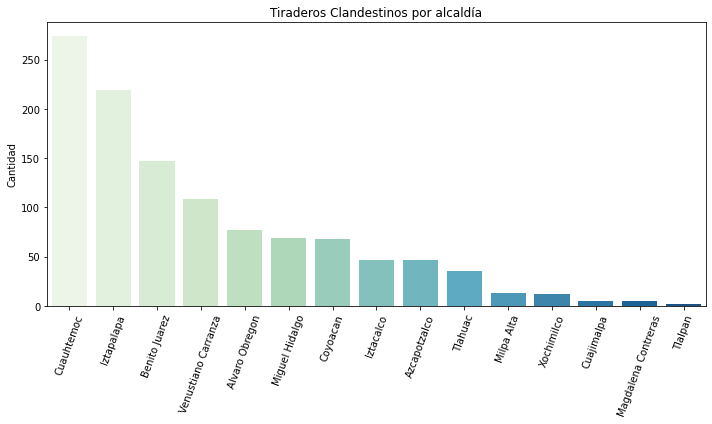

In [36]:
Grafica_valores_countplot('alcaldia',tiraderos_clandestinos_df,
                          title="Tiraderos Clandestinos por alcaldía")

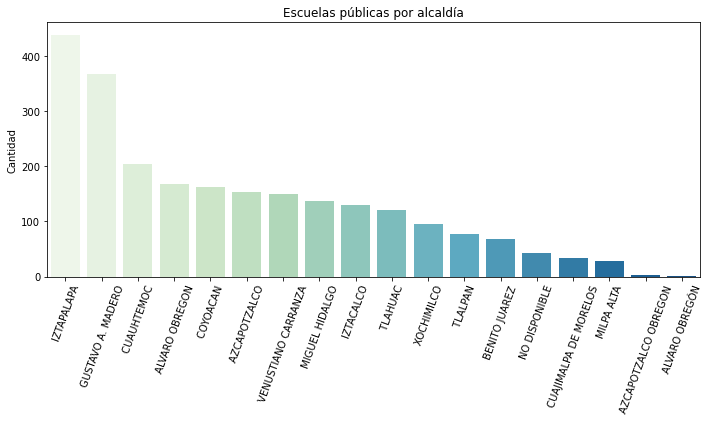

In [37]:
Grafica_valores_countplot("Delegacion",escuelas_publicas_df,title="Escuelas públicas por alcaldía")

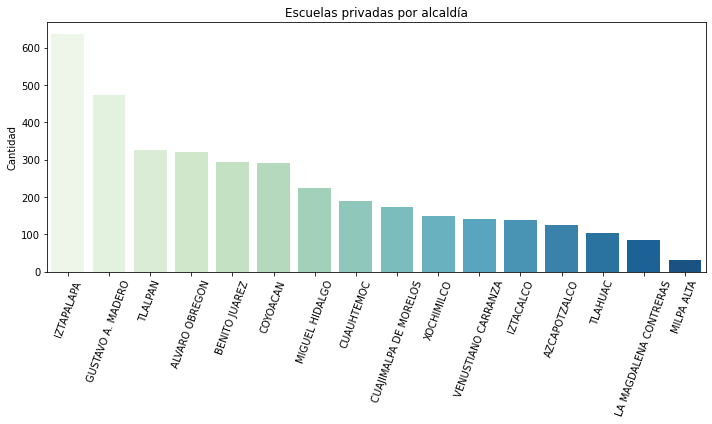

In [38]:
Grafica_valores_countplot("ALCALDÍA",escuelas_privadas_df,title="Escuelas privadas por alcaldía")

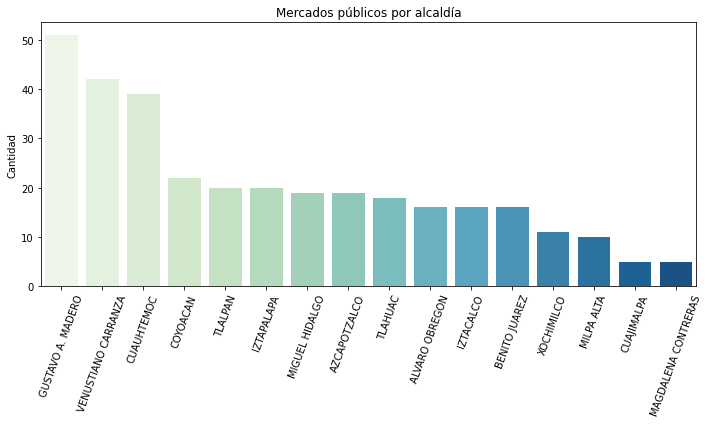

In [39]:
Grafica_valores_countplot("alcaldia",mercados_df,title="Mercados públicos por alcaldía")

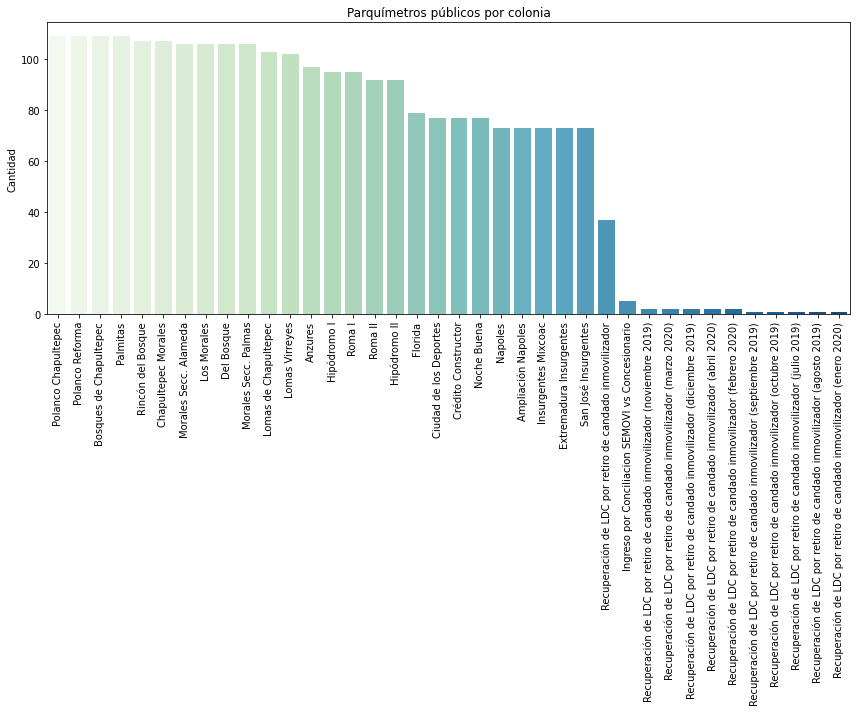

In [40]:
Grafica_valores_countplot("Colonia ",parquimetros_df,title="Parquímetros públicos por colonia",
                          size=(12,10),rot=90)

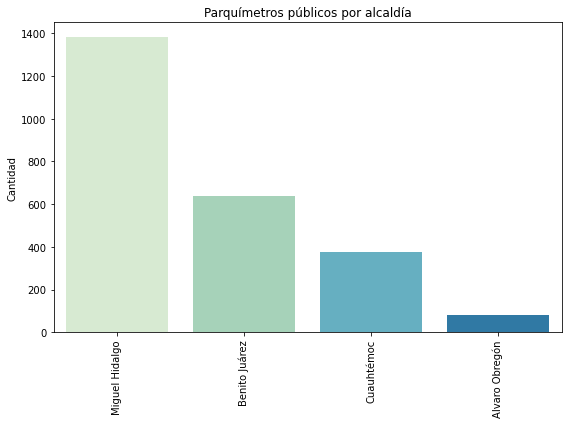

In [41]:
Grafica_valores_countplot("Alcaldía",parquimetros_df,title="Parquímetros públicos por alcaldía",
                          size=(8,6),rot=90)

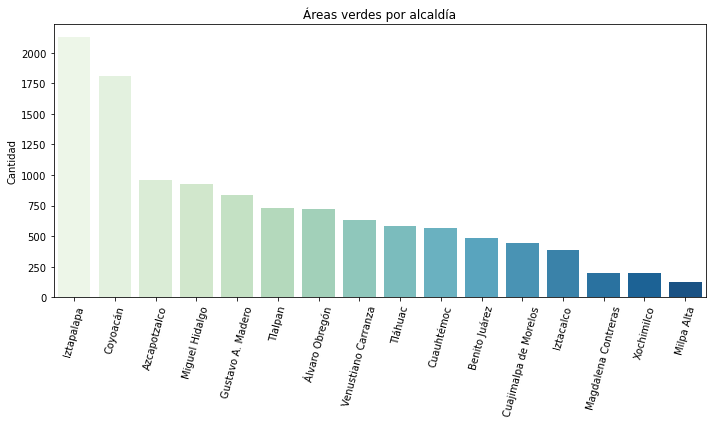

In [42]:
Grafica_valores_countplot("delegacion",areas_verdes_df,title="Áreas verdes por alcaldía",
                          rot=75)

In [43]:
areas_delegacion = areas_verdes_Geo_df.loc[:, ['geometry', 'delegacion']]

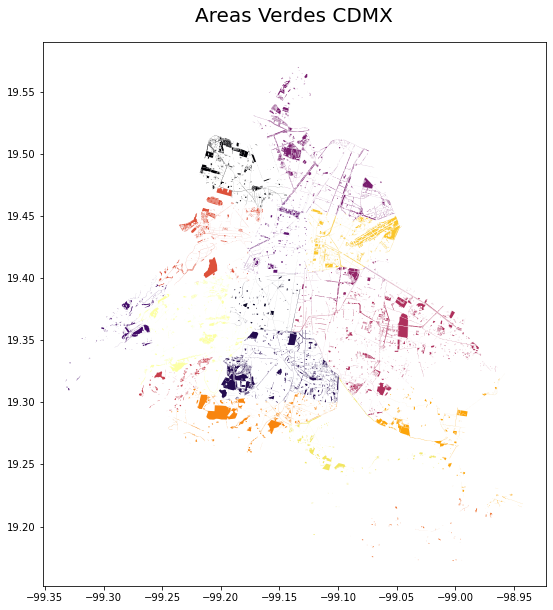

In [44]:
fig, ax = plt.subplots(1,1, figsize=(15, 10))

ax.set_title('Areas Verdes CDMX', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': 'black'})


divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)

areas_delegacion.plot(column='delegacion', cmap='inferno', ax=ax, legend=False)
#plt.savefig("mapa_calor.svg", transparent=True)
plt.show()

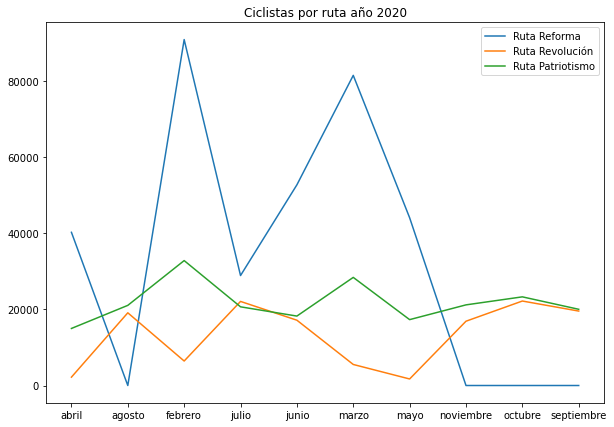

In [45]:
plt.figure(figsize=(10,7))
plt.plot(ciclistas_2020_mes["Contador Ruta Reforma222"], label = 'Ruta Reforma')
plt.plot(ciclistas_2020_mes["Contador Ruta Revolución"], label = 'Ruta Revolución')
plt.plot(ciclistas_2020_mes["Contador Ruta Patriotismo"], label = 'Ruta Patriotismo')
plt.title("Ciclistas por ruta año 2020")
plt.legend()
plt.show()

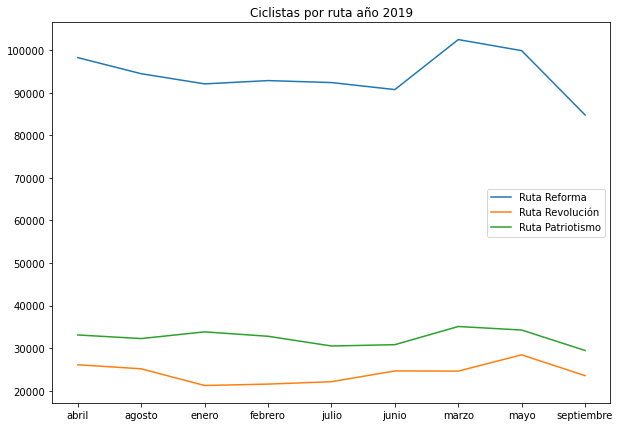

In [46]:
plt.figure(figsize=(10,7))
plt.plot(ciclistas_2019_mes["Contador Ruta Reforma222"], label = 'Ruta Reforma')
plt.plot(ciclistas_2019_mes["Contador Ruta Revolución"], label = 'Ruta Revolución')
plt.plot(ciclistas_2019_mes["Contador Ruta Patriotismo"], label = 'Ruta Patriotismo')
plt.title("Ciclistas por ruta año 2019")
plt.legend()
plt.show()